# Implementing the Watts-Strogatz small-world model

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In this exercise, you will implement the Watts-Strogatz (WS) small-world model, which is a simple network model that yields small diameter as well as high level of clustering. In practice, the WS model is a one-dimensional ring lattice where some of the links have been randomly rewired. The model has three parameters: network size $N$, $m$ (each node on the ring connects to $m$ nearest neighbors to the left and $m$ nearest neighbors to the right), and $p$, the probability of rewiring one end of each link to a random endpoint node.

a) Implement the WS model and generate a network using the parameter values $N$, $m$, and $p$ from the MyCourses page. Report the total number of links and the number of rewired links.
- Notice that each node should have $2m$ neighbors: $m$ to the right and $m$ to the left in the ring.
- NetworkX has a ready-made function for the WS model. However, the task is to program the function yourself, so do not use it (except for checking results, if in doubt.)

You can use the following function to generate a one-dimentional ring lattice.

In [2]:
def ring(n, m):
    """
    This function creates the basic ring (to be rewired) with n nodes in which 
    each node is connected to m nodes on the left and right.


    Parameters
    ----------
    n : int
        number of nodes
    m : int
        number of neighbors to connect left and right (so the degree is 2*m)

    Returns
    -------
    G : networkx graph
        The basic ring graph
    """

    G = nx.Graph()
    G.add_nodes_from(range(n))
    for node in range(n):
        for neighbor in range(node + 1, node + m + 1):
            G.add_edge(node, neighbor % n)
    return G

### a) Implementing the WS model

Building on the `ring()` function above, implement the Watts-Strogatz model.
- You can use `rng.random` to generate a random number between 0 and 1.
- You can use `rng.choice` to choose a random node from a list of nodes.
- You can use `nx.non_neighbors` to iterate over the non-neighbors of a node: `nx.non_neighbors(G, i)` lists all nodes that are not connected to `i` (and are not `i`)

In [3]:
def ws(N, m, p, rng):
    """
    This function calls the ring() function to create a ring and then rewires 
    each edge with probability p, while printing the total number of edges and 
    the number of rewired edges. 
    Note that self-loops and duplicate edges are not allowed when rewiring - 
    make sure that you do not create an edge between a node and itself or an 
    edge that already exists.

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right
    p : float
        Rewiring probability
    rng : numpy.random.Generator
        Random number generator

    Returns
    -------
    network : graph
        The Watts-Strogatz small-world network
    """
    G = ring(N, m)
    num_rewired_edges = 0 # the number of rewired links
    total_num_edges = 0 # the total number of links

    # You should rewire each edge if the random number is less than p
    # Avoid self-loops (rewiring an end of the edge to the other end node) and 
    # duplicate edges (rewiring an end to a neighbor of the other end node)

    # YOUR CODE HERE
    # YOUR CODE HERE
    for edge in G.edges():
        total_num_edges += 1
        if rng.random() < p:
            num_rewired_edges += 1
            while True:
                new_edge = (edge[0], rng.integers(0, N))
                if new_edge[0] != new_edge[1] and new_edge not in G.edges():
                    break
            G.remove_edge(*edge)
            G.add_edge(*new_edge)
        else:
            pass
    # raise NotImplementedError()

    print("Total number of edges: ", total_num_edges)
    print("Number of rewired edges: ", num_rewired_edges)
    return G

In [4]:
WSnet = ws(N=43, m=3, p=0.1, rng=rng) # get the values for N, m and p from your MyCourses question

Total number of edges:  129
Number of rewired edges:  12


### b) Network visualization
Visualize the network using a circular layout algorithm (`nx.draw_circular(G)`), and compare it to the networks shown in MyCourses. Which one resembles your network the most?

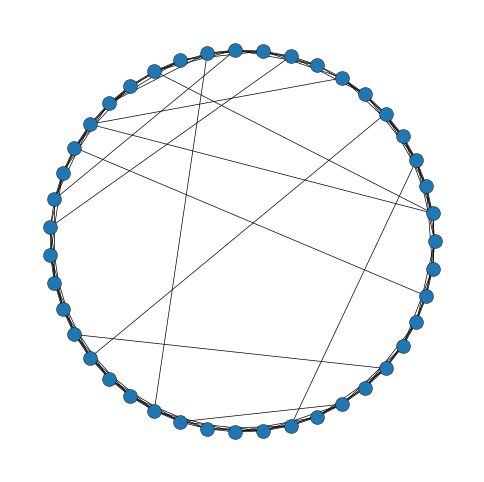

In [5]:
# Let's visualize the network!
fig_vis, ax_vis = plt.subplots(figsize=(6, 6))
nx.draw_circular(WSnet, ax=ax_vis, node_size=100, linewidths=0.3, 
        width=0.5, edgecolors='black')

In [6]:
# Save the figure to current directory
figure_filename = 'WS_visualized.jpg'
fig_vis.savefig(figure_filename)

### c) Path lengths and clustering
Compute the following quantities for $N = 500, m = 2$ and for $p=0.001,\ldots,1.0$ (see the code template for the log-spaced values):
- the ratio $c(p) / c(p=0)$ of the average clustering coefficient to the average clustering coefficient for $p=0$
- the ratio $l(p) / l(p=0)$ of the average path length to the average path length for $p=0$

Plot both curves, using a logarithmic x-axis in your plot. Which of the plots shown on the MyCourses question page resembles your figure the most?

d) Why does the (relative) clustering coefficient behave in your plot this way when the rewiring probability grows?


In [8]:
# Produce the basic ring graph and calculate the average clustering coefficient and average shortest path of the network
N = 500
m = 2
basic_ring = ring(N, m)

c_basic = nx.average_clustering(basic_ring) # Replace!
l_basic = nx.average_shortest_path_length(basic_ring) # Replace!
# YOUR CODE HERE
# raise NotImplementedError()

probabilities = np.logspace(-3, 0, 11) # 11 values uniformly spaced between 10^-3 and 10^0=1 on a log scale
relative_c = [] # list to store the relative average clustering coefficient for each rewiring probability
relative_l = [] # list to store the relative average shortest path length for each rewiring probability

for p in probabilities:
    print("Rewiring probability: ", p)
    smallworld = ws(N=N, m=m, p=p, rng=rng)

    # In most cases, the network is connected. However, in the rare case where it is not, 
    # an exception will be raised when we try to calculate the average shortest path length.
    # To avoid this, we will only consider the largest connected component of the network. 
    largest_component = smallworld.subgraph(max(nx.connected_components(smallworld), key=len))
    
    # Calculate the relative average clustering coefficient and relative average shortest path length
    # and add them to the lists relative_c and relative_l
    # YOUR CODE HERE
    # YOUR CODE HERE
    c = nx.average_clustering(largest_component) / c_basic
    l = nx.average_shortest_path_length(largest_component) / l_basic
    relative_c.append(c)
    relative_l.append(l)
    # raise NotImplementedError()

Rewiring probability:  0.001
Total number of edges:  1000
Number of rewired edges:  1
Rewiring probability:  0.001995262314968879
Total number of edges:  1000
Number of rewired edges:  2
Rewiring probability:  0.003981071705534973
Total number of edges:  1000
Number of rewired edges:  6
Rewiring probability:  0.007943282347242814
Total number of edges:  1000
Number of rewired edges:  4
Rewiring probability:  0.015848931924611134
Total number of edges:  1000
Number of rewired edges:  15
Rewiring probability:  0.03162277660168379
Total number of edges:  1000
Number of rewired edges:  38
Rewiring probability:  0.0630957344480193
Total number of edges:  1000
Number of rewired edges:  55
Rewiring probability:  0.12589254117941676
Total number of edges:  1000
Number of rewired edges:  119
Rewiring probability:  0.25118864315095796
Total number of edges:  1000
Number of rewired edges:  281
Rewiring probability:  0.501187233627272
Total number of edges:  1000
Number of rewired edges:  503
Rewi

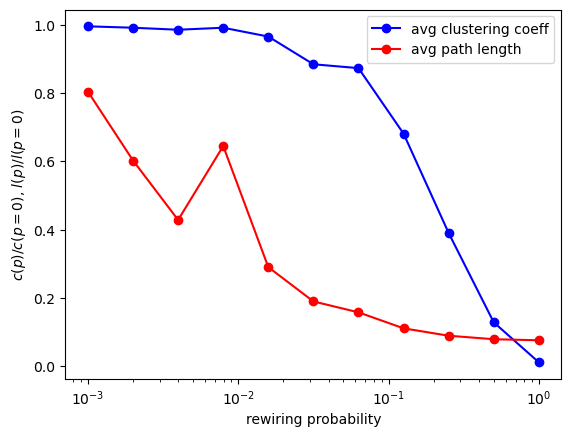

In [9]:
fig_cl, ax_cl = plt.subplots()
ax_cl.plot(probabilities, relative_c, 'o-', color='blue', label='avg clustering coeff')
ax_cl.plot(probabilities, relative_l, 'o-', color='red', label='avg path length')
ax_cl.set_xscale('log')
ax_cl.set_xlabel('rewiring probability')
ax_cl.set_ylabel(r'$c(p) / c(p=0)$, $l(p) / l(p=0)$')
ax_cl.legend()

In [10]:
# Save the figure to current directory, modify path if you want to save somewhere else
figure_path='./'
figure_filename = 'WS_clustering_pathlength.pdf'
fig_cl.savefig(figure_path+figure_filename)